<a href="https://colab.research.google.com/github/0danysha0/Practice-ML-DEV/blob/HW_%D0%A4%D0%B8%D0%BB%D0%B8%D0%BC%D0%BE%D1%88%D0%B8%D0%BD%D0%B0_%D0%94%D0%94/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA%D0%B0_%D1%82%D0%BE%D0%B2%D0%B0%D1%80%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

   Product ID                                      Product Title  \
0           1                    apple iphone 8 plus 64gb silver   
1           2                apple iphone 8 plus 64 gb spacegrau   
2           3  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...   
3           4                apple iphone 8 plus 64gb space grey   
4           5  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...   

    Merchant ID   Cluster ID             Cluster Label   Category ID  \
0             1            1  Apple iPhone 8 Plus 64GB          2612   
1             2            1  Apple iPhone 8 Plus 64GB          2612   
2             3            1  Apple iPhone 8 Plus 64GB          2612   
3             4            1  Apple iPhone 8 Plus 64GB          2612   
4             5            1  Apple iPhone 8 Plus 64GB          2612   

   Category Label  
0   Mobile Phones  
1   Mobile Phones  
2   Mobile Phones  
3   Mobile Phones  
4   Mobile Phones  
<class 'pandas.core.frame.DataFrame'>


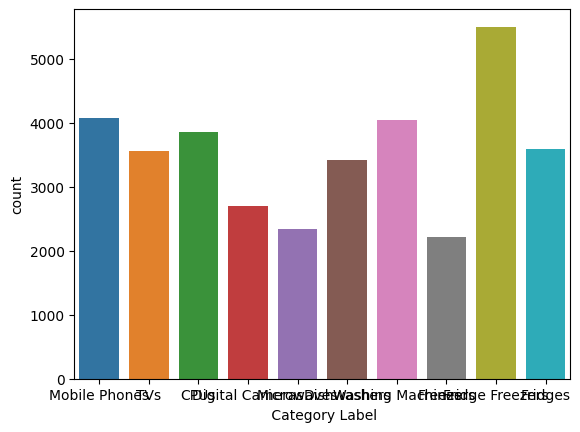

<ipython-input-3-22afabaf2f3f>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


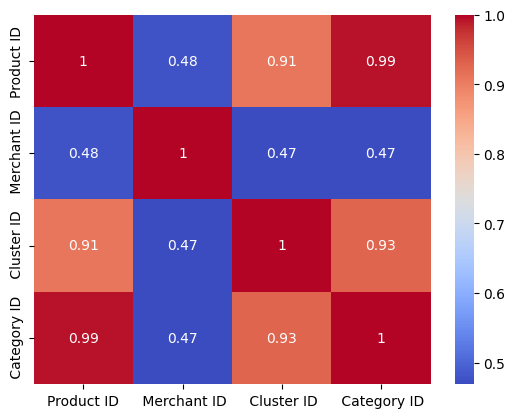

<ipython-input-3-22afabaf2f3f>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


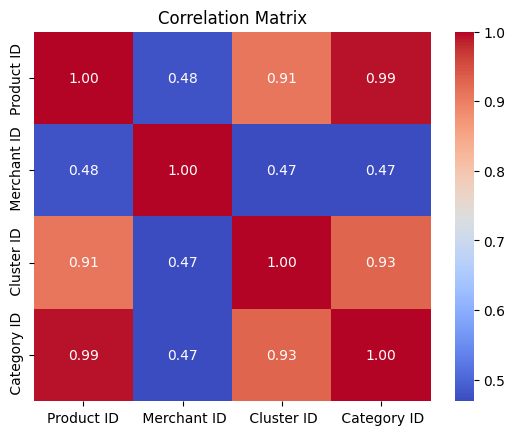

Корреляция между Category ID и Cluster ID 0.9932762120496194


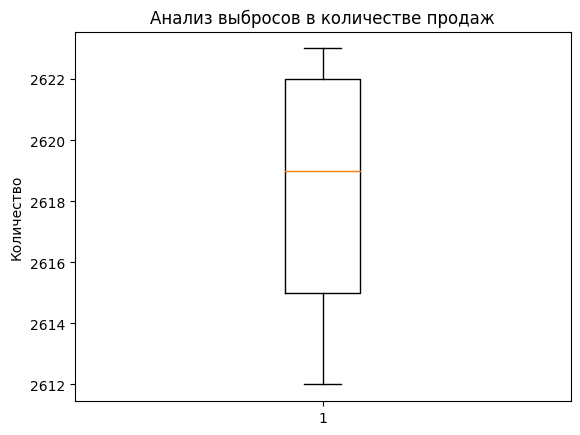

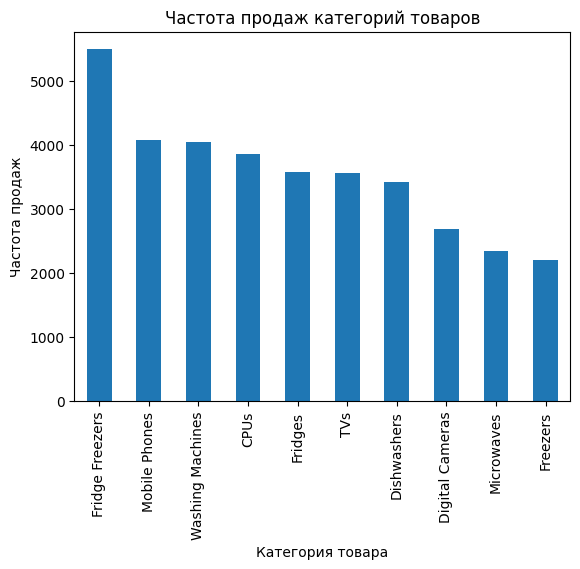

<ipython-input-3-22afabaf2f3f>:41: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)


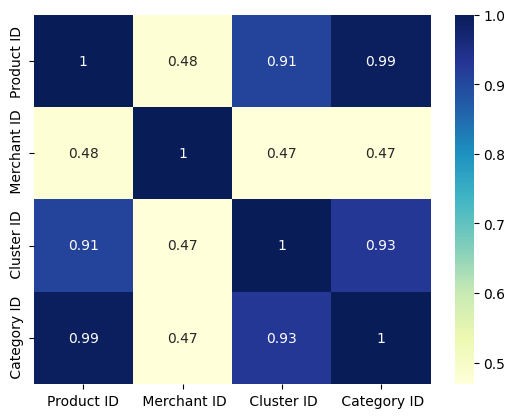

In [ ]:
dataset = pd.read_csv('pricerunner_aggregate.csv')

print(dataset.head())
print(dataset.info())
print(dataset.describe())
sns.countplot(x=' Category Label', data=dataset)
plt.show()
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
correlation_matrix = dataset.corr()

# Визуализируйте матрицу корреляции
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



correlation = dataset[' Category ID'].corr(dataset['Product ID'])
print("Корреляция между Category ID и Cluster ID", correlation)

#box-plot для  Category ID
plt.boxplot(dataset[' Category ID'])
plt.ylabel('Количество')
plt.title('Анализ выбросов в количестве продаж')
plt.show()

#распределение частот для Category Label
product_counts = dataset[' Category Label'].value_counts()
product_counts.plot(kind='bar')
plt.xlabel('Категория товара')
plt.ylabel('Частота продаж')
plt.title('Частота продаж категорий товаров')
plt.xticks(rotation=90)
plt.show()

#print(dataset.corr())

# plotting correlation heatmap
dataplot = sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()




1. Задача классификации


In [3]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, precision_recall_fscore_support
import pandas as pd

# Загрузка данных
dataset = pd.read_csv('pricerunner_aggregate.csv')

# Разделение на признаки (X) и целевую переменную (y)
X = dataset.drop([' Category ID', ' Category Label'], axis=1)
y_id = dataset[' Category ID']
y_label = dataset[' Category Label']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train_id, y_test_id, y_train_label, y_test_label = train_test_split(
    X, y_id, y_label, test_size=0.2, random_state=42
)

# Подготовка признаков: преобразование категориальных данных в числовые
numeric_features = X.select_dtypes(include=['int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Используем ColumnTransformer и Pipeline для преобразования данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Выбор модели и создание конвейера
model = RandomForestClassifier(random_state=42)
classifier = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

# Обучение модели на обучающем наборе данных
classifier.fit(X_train, y_train_id)

# Сохранение обученной модели в файл
joblib.dump(classifier, 'trained_model.joblib')

# Предсказание на тестовом наборе
y_pred_id = classifier.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test_id, y_pred_id)
print(f'Accuracy: {accuracy:.2f}')

# Вычисление метрик precision, recall и f1-score для каждого класса
precision, recall, f1, _ = precision_recall_fscore_support(y_test_id, y_pred_id)

# Создание DataFrame для удобного вывода результатов
metrics_df = pd.DataFrame({
    'Class': sorted(y_test_id.unique()),
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
})

# Вывод результатов
print(metrics_df)

# Дополнительно, вы можете вывести отчет о классификации
#print(classification_report(y_test_id, y_pred_id))

Accuracy: 1.00
   Class  Precision  Recall  F1-score
0   2612        1.0     1.0       1.0
1   2614        1.0     1.0       1.0
2   2615        1.0     1.0       1.0
3   2617        1.0     1.0       1.0
4   2618        1.0     1.0       1.0
5   2619        1.0     1.0       1.0
6   2620        1.0     1.0       1.0
7   2621        1.0     1.0       1.0
8   2622        1.0     1.0       1.0
9   2623        1.0     1.0       1.0


In [2]:
# Проверка баланса классов для целевой переменной 'Category ID'
class_distribution = dataset[' Category Label'].value_counts()
print(class_distribution)

Fridge Freezers     5501
Mobile Phones       4081
Washing Machines    4044
CPUs                3862
Fridges             3584
TVs                 3564
Dishwashers         3424
Digital Cameras     2697
Microwaves          2342
Freezers            2212
Name:  Category Label, dtype: int64


2. Задача линейной регресии

In [4]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Загрузка данных
dataset = pd.read_csv('pricerunner_aggregate.csv')

# Разделение на признаки (X) и целевую переменную (y)
X = dataset[['Product ID', ' Merchant ID', ' Cluster ID']]  # Выберите нужные числовые признаки
y = dataset[' Category ID']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Сохранение обученной модели в файл
joblib.dump(regressor, 'linear_regression_model.joblib')

# Предсказание на тестовом наборе
y_pred = regressor.predict(X_test)

# Оценка производительности модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.13
R-squared: 0.99


3. Задача класстеризации